importing libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

downloading stocks data

In [2]:
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

calculating moving average

In [3]:
def calculate_moving_averages(data, short_window=40, long_window=100):
    data['SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['LMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

**calculating RSI**

In [4]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

**calculating MACD**

In [5]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['MACD'] = data['Close'].ewm(span=short_window, adjust=False).mean() - data['Close'].ewm(span=long_window, adjust=False).mean()
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

Generating Buy or Sell Signals

In [6]:
def generate_signals(data):
    buy_signals = []
    sell_signals = []
    position = False

    for i in range(len(data)):
        if data['SMA'][i] > data['LMA'][i] and data['RSI'][i] < 30 and data['MACD'][i] > data['Signal Line'][i]:
            if not position:
                buy_signals.append(data['Close'][i])
                sell_signals.append(np.nan)
                position = True
            else:
                buy_signals.append(np.nan)
                sell_signals.append(np.nan)
        elif data['SMA'][i] < data['LMA'][i] and data['RSI'][i] > 70 and data['MACD'][i] < data['Signal Line'][i]:
            if position:
                buy_signals.append(np.nan)
                sell_signals.append(data['Close'][i])
                position = False
            else:
                buy_signals.append(np.nan)
                sell_signals.append(np.nan)
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)

    data['Buy Signals'] = buy_signals
    data['Sell Signals'] = sell_signals
    return data

Plotting the data

In [7]:
def plot_data(data, ticker):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data['SMA'], label='SMA', alpha=0.75)
    plt.plot(data['LMA'], label='LMA', alpha=0.75)
    plt.scatter(data.index, data['Buy Signals'], label='Buy Signal', marker='^', color='green')
    plt.scatter(data.index, data['Sell Signals'], label='Sell Signal', marker='v', color='red')
    plt.title(f'{ticker} Stock Price and Buy/Sell Signals')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(data['MACD'], label='MACD', alpha=0.75)
    plt.plot(data['Signal Line'], label='Signal Line', alpha=0.75)
    plt.title(f'{ticker} MACD and Signal Line')
    plt.legend()

    plt.tight_layout()
    plt.show()

Main Function

[*********************100%%**********************]  1 of 1 completed


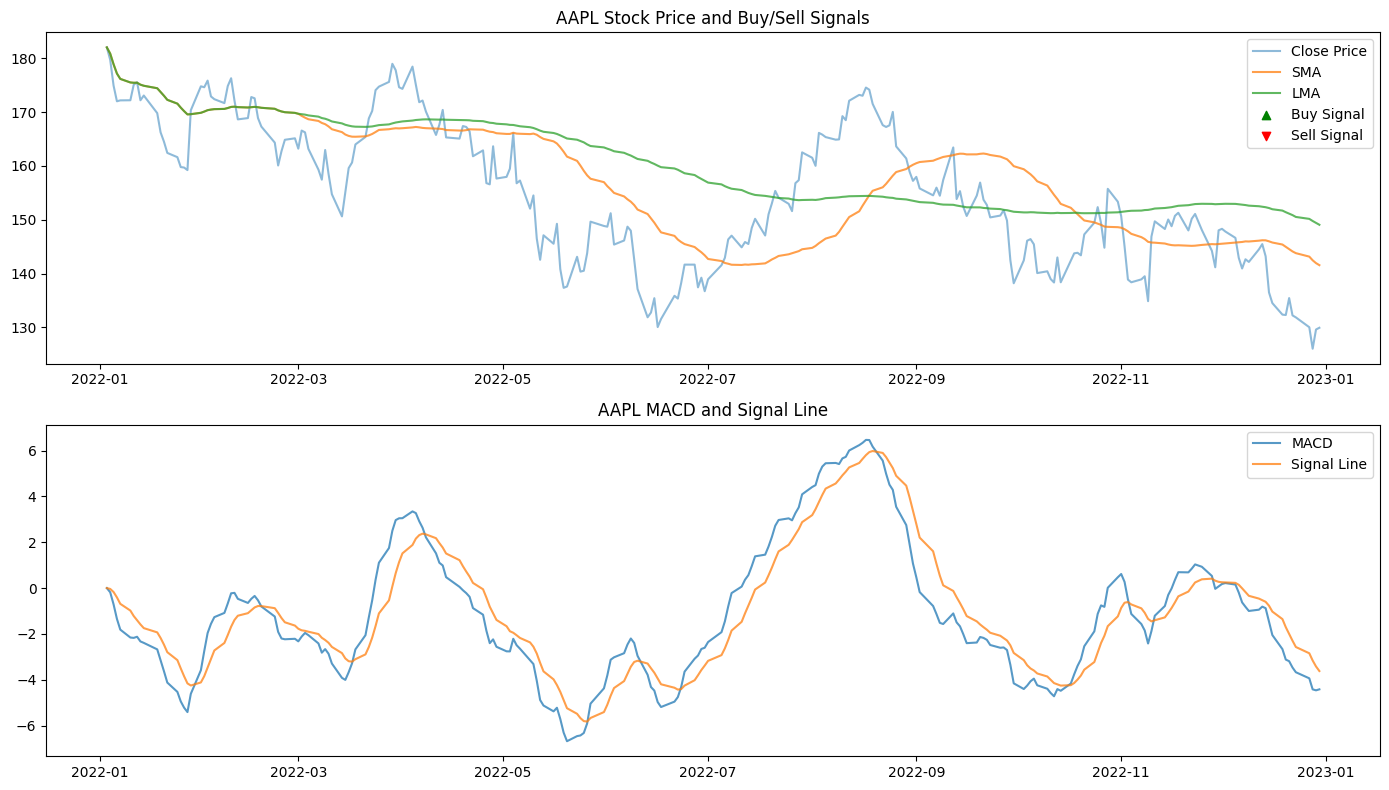

In [8]:
def main():
    ticker = 'AAPL'
    start_date = '2022-01-01'
    end_date = '2023-01-01'

    data = download_data(ticker, start_date, end_date)
    data = calculate_moving_averages(data)
    data = calculate_rsi(data)
    data = calculate_macd(data)
    data = generate_signals(data)

    plot_data(data, ticker)

if __name__ == "__main__":
    main()